In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Loading Datasets and Importing Libraries 

In [118]:
# Importing Tensorflow and the required visualization libraries
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Loading the Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [119]:
# Seperating the independent feature as y
y = train['label']
train = train.drop('label', axis =1)

# Visualizing Data

c:\Users\voxua\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

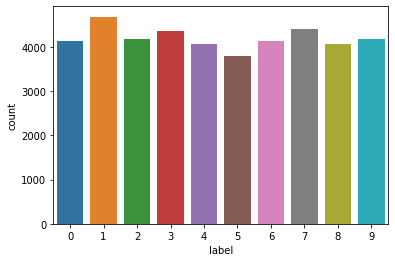

In [120]:
#Visualizing the Distribution of digits in labels
sns.countplot(y)

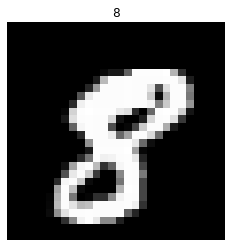

In [121]:
#Visualing an example 
img = train.iloc[10].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y.iloc[10])
plt.axis("off")
plt.show()

# Preprocessing Data

In [122]:
#Preprocessing the Data
train=train/225.0
test = test/225.0
train = np.array(train)
test= np.array(test)
train = train.reshape(train.shape[0], 28, 28,1)
test = test.reshape(test.shape[0], 28, 28,1)

#Splitting the data into training and validation 
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train, y, test_size=0.2)

#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = tf.keras.utils.to_categorical(Y_val, num_classes=10)

# Building, Compiling and Training model


In [123]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),    
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [124]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\voxua\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [125]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  

In [126]:
#Training the model without data augmentation
history = model.fit(X_train, Y_train, batch_size=64, epochs=15, validation_data=(X_val, Y_val))

c:\Users\voxua\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/15
525/525 [==============================] - 41s 78ms/step - loss: 0.2285 - accuracy: 0.9265 - val_loss: 0.0887 - val_accuracy: 0.9702
Epoch 2/15
525/525 [==============================] - 41s 78ms/step - loss: 0.0797 - accuracy: 0.9751 - val_loss: 0.0846 - val_accuracy: 0.9773
Epoch 3/15
525/525 [==============================] - 41s 78ms/step - loss: 0.0572 - accuracy: 0.9818 - val_loss: 0.0504 - val_accuracy: 0.9851
Epoch 4/15
525/525 [==============================] - 40s 77ms/step - loss: 0.0461 - accuracy: 0.9851 - val_loss: 0.0487 - val_accuracy: 0.9844
Epoch 5/15
525/525 [==============================] - 37s 70ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0406 - val_accuracy: 0.9890
Epoch 6/15
525/525 [==============================] - 37s 70ms/step - loss: 0.0341 - accuracy: 0.9885 - val_loss: 0.0438 - val_accuracy: 0.9887
Epoch 7/15
525/525 [==============================] - 37s 70ms/step - loss: 0.0352 - accuracy: 0.9874 - val_loss: 0.0379 - val_accuracy:

# Evaluating Results

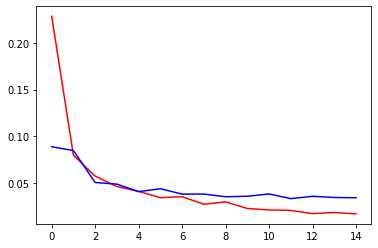

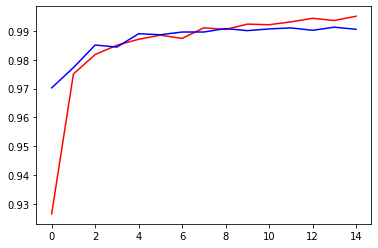

In [127]:
#Comparing losses and accuraries 
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.show()
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.show()

In [128]:
#Plotting Confusion Matrix
y_pred1 = model.predict(X_val)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

263/263 [==============================] - 4s 14ms/step
[[852   0   1   1   0   0   0   0   2   0]
 [  0 912   4   0   0   0   1   0   0   0]
 [  0   0 795   3   0   0   0   2   0   0]
 [  0   0   4 845   0   0   0   0   4   2]
 [  0   0   0   0 795   0   2   0   0   6]
 [  1   0   0   9   0 766   0   1   0   0]
 [  2   0   0   0   0   2 829   0   0   0]
 [  1   1   3   0   1   0   0 888   0   0]
 [  1   1   1   2   0   2   0   1 824   2]
 [  3   0   1   1   4   2   0   3   2 815]]


# Saving the Predictions

In [129]:
#Predicting and Saving it as a CSV file
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv('RESULT.csv', index=False)

  9/875 [..............................] - ETA: 11s

c:\Users\voxua\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


875/875 [==============================] - 12s 14ms/step
